In [1]:
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 40kB/s 
     |████████████████████████████████| 450kB 36.2MB/s 
     |████████████████████████████████| 3.9MB 36.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=0c29db6b92be16161383842db13efcae20f2140ca59babb86228eece4514d13d
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: 

In [2]:
!pip install tensorflow_quantum

     |████████████████████████████████| 3.9MB 3.4MB/s 
     |████████████████████████████████| 5.3MB 25.0MB/s 
     |████████████████████████████████| 1.4MB 39.5MB/s 
     |████████████████████████████████| 163kB 41.5MB/s 
     |████████████████████████████████| 1.2MB 40.3MB/s 
     |████████████████████████████████| 112kB 36.8MB/s 
     |████████████████████████████████| 133kB 42.1MB/s 
  Created wheel for pathos: filename=pathos-0.2.5-cp36-none-any.whl size=77577 sha256=418cd4adf8610bb00474531b4930ecff35e1589c2addaf41018bddc9d9d0d05f
  Stored in directory: /root/.cache/pip/wheels/61/6d/83/90b0c3d2c271da2c4850731e894798c98f8dbedbac74e8eff0
  Created wheel for ppft: filename=ppft-1.6.6.2-cp36-none-any.whl size=64743 sha256=3702add3433a018fc8aaf7bf292672cdc52ba367ff3d9097246b47c92db22a8c
  Stored in directory: /root/.cache/pip/wheels/db/d2/2d/0ee21ede61786bb13247dbc69079373fd500c2bb0481913084
  Created wheel for pox: filename=pox-0.2.8-cp36-none-any.whl size=28290 sha256=df49b86485e7aee

In [3]:
!pip install quple

In [4]:
import tensorflow_quantum as tfq
import cirq
import numpy as np
import tensorflow as tf
import quple

In [5]:
from quple.trial_wavefunction.real_amplitudes import RealAmplitudes
# define a PQC
n_qubit = 5
# define a parameterised circuit
cq = RealAmplitudes(n_qubit)
cq

┌──┐       ┌──┐                                 ┌──┐       ┌──┐
(0, 0): ───Ry(θ_0)───@───@───@────@────────────────────────Ry(θ_5)───@───@───@────@────────────────────────
                     │   │   │    │                                  │   │   │    │
(1, 0): ───Ry(θ_1)───X───┼───┼────┼@────@────@─────────────Ry(θ_6)───X───┼───┼────┼@────@────@─────────────
                         │   │    ││    │    │                           │   │    ││    │    │
(2, 0): ───Ry(θ_2)───────X───┼────┼X────┼────┼@────@───────Ry(θ_7)───────X───┼────┼X────┼────┼@────@───────
                             │    │     │    ││    │                         │    │     │    ││    │
(3, 0): ───Ry(θ_3)───────────X────┼─────X────┼X────┼───@───Ry(θ_8)───────────X────┼─────X────┼X────┼───@───
                                  │          │     │   │                          │          │     │   │
(4, 0): ───Ry(θ_4)────────────────X──────────X─────X───X───Ry(θ_9)────────────────X──────────X─────X───X───
                                 └──┘       └──┘                                 └──┘       └──┘

# Gradient Variance Test

In [6]:
# define a measurement
qubits = cq.qubits
op = cirq.Z(qubits[0]) * cirq.Z(qubits[1])

In [7]:
# Do the gradient variance test
quple.gradient_variance_test([cq]*200, op)

0.3667903

# Sample Circuit Qubit Final States

In [8]:
final_states = quple.sample_final_states(cq, samples=200)
final_states

Instructions for updating:
reduction_indices is deprecated, use axis instead


[array([ 0.08916375-9.0040722e-09j,  0.26493376+5.3913116e-08j,
        -0.17119648-6.4985879e-09j, -0.14315148+5.8087846e-10j,
         0.28533638+5.6890137e-08j,  0.32902452+6.4483302e-08j,
        -0.02555048+7.2498754e-09j, -0.24954878-1.0833929e-07j,
        -0.21016903-2.6277942e-08j, -0.29788506-3.1162216e-08j,
        -0.05675585+1.3126504e-09j,  0.06588243+5.8180600e-08j,
        -0.00212155+1.1382149e-08j,  0.17142183+8.7364704e-08j,
        -0.23777862-3.7810931e-08j, -0.29139057-4.5935206e-08j,
        -0.12501074-2.5606759e-08j, -0.17947371-3.1459400e-08j,
        -0.03687329+1.3862866e-10j,  0.03432805+4.0119378e-08j,
         0.00135698+5.4961191e-09j,  0.1170688 +5.5265208e-08j,
        -0.15642777-2.5853817e-08j, -0.18967474-3.2358198e-08j,
         0.06214744+6.6543211e-09j,  0.19005412+1.1909459e-07j,
        -0.1266653 -6.6557220e-08j, -0.10872483-4.3972637e-08j,
         0.19270737+1.0957997e-07j,  0.22052735+1.1286830e-07j,
        -0.01954989-9.0694261e-09j, -0.1

# Sample Circuit Qubit Density Matrices

In [9]:
density_matrices = quple.sample_density_matrices(cq, samples=200)
density_matrices

[array([[ 0.00139969+0.00000000e+00j, -0.00137022-9.53340185e-12j,
         -0.00117523+9.66254854e-13j, ...,  0.00899163-8.25861068e-09j,
         -0.02480468+2.39956393e-08j,  0.01699493-1.69463767e-08j],
        [-0.00137022+9.53340185e-12j,  0.00134136+0.00000000e+00j,
          0.00115048-8.95046537e-12j, ..., -0.00880228+8.14593815e-09j,
          0.02428232-2.36592683e-08j, -0.01663704+1.67052630e-08j],
        [-0.00117523-9.66254854e-13j,  0.00115048+8.95046537e-12j,
          0.00098676+0.00000000e+00j, ..., -0.00754967+6.92799462e-09j,
          0.02082682-2.01304058e-08j, -0.0142695 +1.42170045e-08j],
        ...,
        [ 0.00899163+8.25861068e-09j, -0.00880228-8.14593815e-09j,
         -0.00754967-6.92799462e-09j, ...,  0.05776232+0.00000000e+00j,
         -0.15934542+7.79304798e-09j,  0.10917555-8.58840110e-09j],
        [-0.02480468-2.39956393e-08j,  0.02428232+2.36592683e-08j,
          0.02082682+2.01304058e-08j, ..., -0.15934542-7.79304798e-09j,
          0.4395765 

# Meyer Wallach measure of a State

In [10]:
Meyer_Wallach_measure = quple.Meyer_Wallach_measure(final_states[0])
Meyer_Wallach_measure

0.704620734925661

# Meyer Wallach measure of a Bell State

In [11]:
bell_circuit = quple.bell_circuit
final_state = quple.sample_final_states(bell_circuit)[0]
Meyer_Wallach_measure = quple.Meyer_Wallach_measure(final_state)
Meyer_Wallach_measure

0.999999880790714

# The von Neumann entropy of PQC
- Parameters are filled with randomized values between 0 and 2pi and the circuit is sampled many times

In [12]:
quple.circuit_von_neumann_entropy(cq, samples=200)

1.8269280665968662e-06

# The Entangling measure of PQC
- This is the mean Meyer Wallach measure of all the final states sampled from the circuit
- Parameters are filled with randomized values between 0 and 2pi and the circuit is sampled many times

In [13]:
quple.circuit_entangling_measure(cq, samples=200)

0.6086516974221743

# The Expressibility measure of PQC
- This is the Kullback Leibler divergence between the fidelity pdf of PQC and the Haar fidelity pdf
- Parameters are filled with randomized values between 0 and 2pi and the circuit is sampled many times

In [14]:
quple.circuit_expressibility_measure(cq, samples=3000, bins=100)

2.690928927726171

#  Plotting the fidelity pdf of PQC and Haar

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

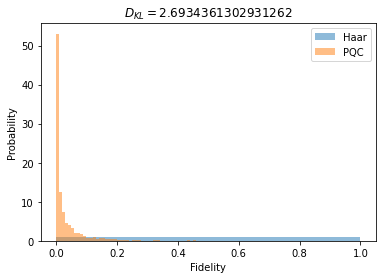

In [15]:
quple.circuit_fidelity_plot(cq, samples=3000, bins=100)

# Reproducing results from the paper page 5:
# https://arxiv.org/pdf/1905.10876.pdf

In [16]:
import sympy as sp
# circuit A
cq_A = quple.QuantumCircuit(n_qubit=1)
cq_A.H(0)
cq_A.RZ(sp.Symbol('x'),0)
cq_A

(0, 0): ───H───Rz(x)───

In [17]:
# circuit B
cq_B = quple.QuantumCircuit(n_qubit=1)
cq_B.H(0)
cq_B.RZ(sp.Symbol('x_0'),0)
cq_B.RX(sp.Symbol('x_1'),0)
cq_B

(0, 0): ───H───Rz(x_0)───Rx(x_1)───

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

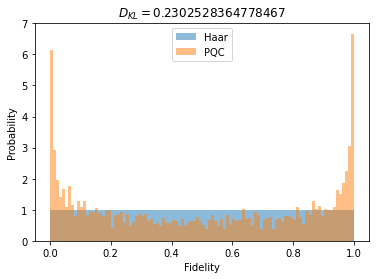

In [18]:
quple.circuit_fidelity_plot(cq_A, samples=3000, bins=100)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

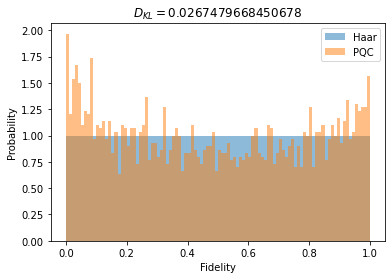

In [19]:
quple.circuit_fidelity_plot(cq_B, samples=3000, bins=100)